<a href="https://colab.research.google.com/github/MeeraSadhu/ASSIGNMENTLETSUPGRADE_ML-submission/blob/main/Assignment_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [97]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [98]:
df = pd.read_csv('/content/gdrive/My Drive/dataset/HousePrice/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
df1 = pd.read_csv('/content/gdrive/My Drive/dataset/HousePrice/test.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [100]:
print('The training data size before dropping Id feature is : {} '.format(df.shape))
print('The test data size before dropping Id feature is : {} '.format(df1.shape))

The training data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


In [101]:
print('The information of training data is:')      
print(df.info())

The information of training data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    

In [102]:
print('The information of test data is:')      
print(df1.info())

The information of test data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459

In [103]:
print('The summary of training data is:')      
print(df.describe())

The summary of training data is:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645

In [104]:
print('The summary of test data is:')      
print(df1.describe())

The summary of test data is:
                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625

In [105]:
from scipy import stats
from scipy.stats import norm, skew 


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

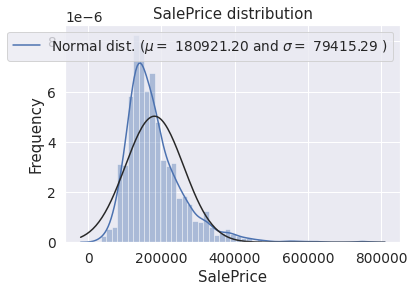

In [106]:
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
sns.distplot(df['SalePrice'] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

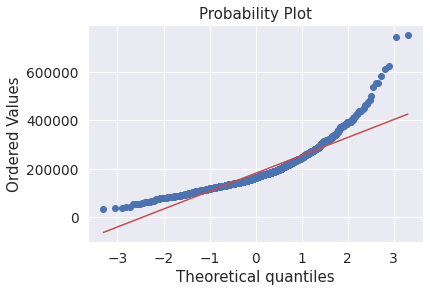

In [107]:
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)


In [108]:
df["SalePrice"] = np.log1p(df["SalePrice"])


 mu = 12.02 and sigma = 0.40



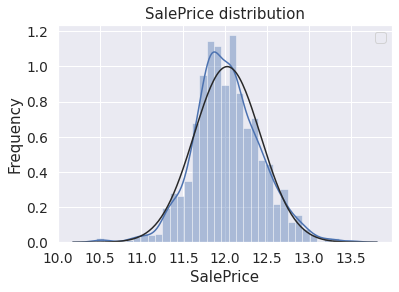

In [109]:
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
sns.distplot(df['SalePrice'] , fit=norm)

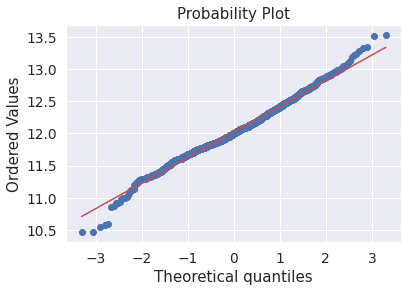

In [110]:
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [111]:
# checking for the missing value in training data
missing_train = df.isnull().sum().sort_values(ascending = False)
missing_train

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [112]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [113]:
miss_df = find_missing_percent(df)
'''Displays columns with missing values'''
display(miss_df[miss_df['PercentMissing']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(miss_df[miss_df['PercentMissing']>0.0].shape[0])}")

,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
6,Alley,1369.0,93.77
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07




Number of columns with missing values:19


In [114]:
'''Segregate the numeric and categoric data'''
numeric_cols = df.select_dtypes(['float','int']).columns
categoric_cols = df.select_dtypes('object').columns

train_numeric = df[numeric_cols[:-1]]
train_categoric = df[categoric_cols]

test_numeric = df1[numeric_cols[:-1]]
test_categoric = df1[categoric_cols]

nominal_cols = ['MSZoning', 'Street','LandContour','Neighborhood','Condition1','Condition2',
                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
                'Heating','GarageType','SaleType','SaleCondition']
ordinal_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                'FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','LotShape',
                'Utilities','LandSlope','BldgType','HouseStyle','LotConfig']

In [115]:
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
#from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
import xgboost

In [116]:
def mice_imputation_numeric(train_numeric, test_numeric):
    """
    Impute numeric data using MICE imputation with Gradient Boosting Regressor.
    """
    iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
    imputed_train = iter_imp_numeric.fit_transform(train_numeric)
    imputed_test = iter_imp_numeric.transform(test_numeric)
    train_numeric_imp = pd.DataFrame(imputed_train, columns = train_numeric.columns, index= train_numeric.index)
    test_numeric_imp = pd.DataFrame(imputed_test, columns = test_numeric.columns, index = test_numeric.index)
    return train_numeric_imp, test_numeric_imp
    
def mice_imputation_categoric(train_categoric, test_categoric):
    """
    Impute categoric data using MICE imputation with Gradient Boosting Classifier.
    Steps:
    1. Ordinal Encode the non-null values
    2. Use MICE imputation with Gradient Boosting Classifier to impute the ordinal encoded data
    3. Inverse transform the ordinal encoded data.
    """
    ordinal_dict={}
    for col in train_categoric:
        '''Ordinal encode train data'''
        ordinal_dict[col] = OrdinalEncoder()
        nn_vals = np.array(train_categoric[col][train_categoric[col].notnull()]).reshape(-1,1)
        nn_vals_arr = np.array(ordinal_dict[col].fit_transform(nn_vals)).reshape(-1,)
        train_categoric[col].loc[train_categoric[col].notnull()] = nn_vals_arr

    for col in test_categoric:
        '''Ordinal encode test data'''
        nn_vals = np.array(test_categoric[col][test_categoric[col].notnull()]).reshape(-1,1)
        nn_vals_arr = np.array(ordinal_dict[col].transform(nn_vals)).reshape(-1,)
        test_categoric[col].loc[test_categoric[col].notnull()] = nn_vals_arr
    
    '''Impute the data using MICE with Gradient Boosting Classifier'''
    iter_imp_categoric = IterativeImputer(GradientBoostingClassifier(),max_iter =5, initial_strategy='most_frequent')
    imputed_train = iter_imp_categoric.fit_transform(train_categoric)
    imputed_test = iter_imp_categoric.transform(test_categoric)
    train_categoric_imp = pd.DataFrame(imputed_train, columns =train_categoric.columns,index = train_categoric.index).astype(int)
    test_categoric_imp = pd.DataFrame(imputed_test, columns=test_categoric.columns,index =test_categoric.index).astype(int)
    
    '''Inverse Transform'''
    for col in train_categoric_imp.columns:
        oe = ordinal_dict[col]
        train_arr= np.array(train_categoric_imp[col]).reshape(-1,1)
        test_arr = np.array(test_categoric_imp[col]).reshape(-1,1)
        train_categoric_imp[col] = oe.inverse_transform(train_arr)
        test_categoric_imp[col] = oe.inverse_transform(test_arr)

    return train_categoric_imp, test_categoric_imp

In [117]:
train_numeric_imp, test_numeric_imp = mice_imputation_numeric(train_numeric,test_numeric)
train_categoric_imp, test_categoric_imp = mice_imputation_categoric(train_categoric, test_categoric)

'''Concatenate Numeric and Categoric Training and Test set data '''
train = pd.concat([train_numeric_imp, train_categoric_imp, df['SalePrice']], axis = 1)
test = pd.concat([test_numeric_imp, test_categoric_imp], axis =1)

Text(0.5, 1.0, 'Missing value in trianing data')

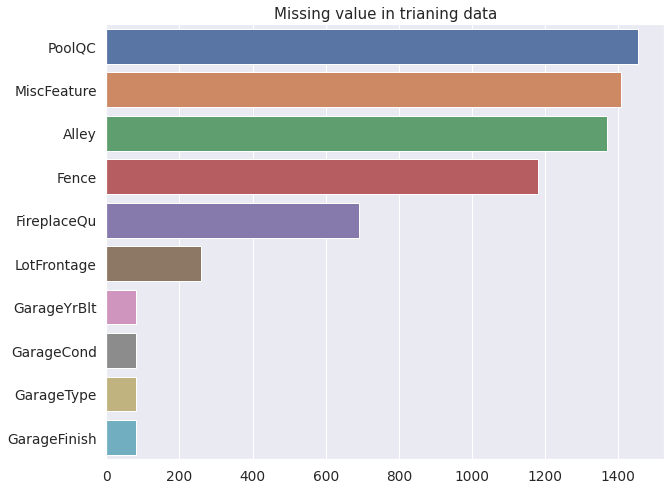

In [118]:
#plot the top 10 missing values
missing_x_axis = missing_train[:10]
missing_y_axis = missing_train[:10].index
width = 10
height = 8
plt.figure(figsize=(width, height))

sns.barplot(missing_x_axis, missing_y_axis)
plt.title('Missing value in trianing data')

Text(0.5, 1.0, 'Missing value in test data')

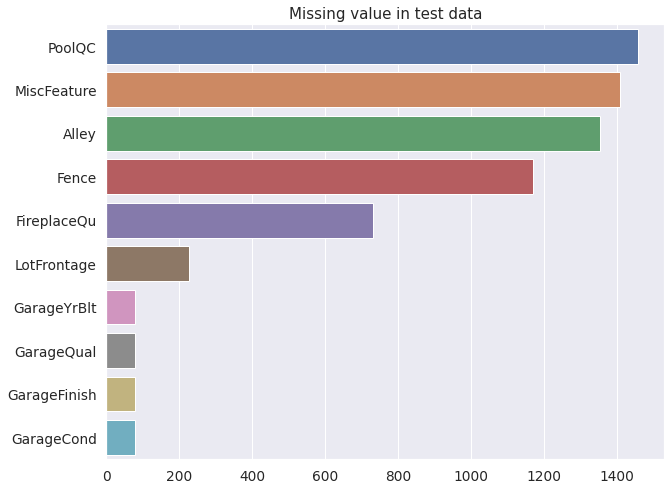

In [119]:
# check the top 10 missing values in test data
missing_test = df1.isnull().sum().sort_values(ascending = False)

missing_x_axis = missing_test[:10]
missing_y_axis = missing_test[:10].index

width = 10
height = 8
plt.figure(figsize=(width, height))

sns.barplot(missing_x_axis, missing_y_axis)
plt.title('Missing value in test data')

In [120]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df[col].fillna('None',inplace=True)
    df1[col].fillna('None',inplace=True)

In [121]:
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_percent], axis=1, keys=['Missing Value Total', 'Percent'])
missing_data.head()


,Missing Value Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000


In [122]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
cols_fillna = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for col in cols_fillna:
    df[col].fillna(df[col].mean(), inplace=True)
    df1[col].fillna(df1[col].mean(), inplace=True)


In [123]:
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_percent], axis=1, keys=['Missing Values Total', 'Percent'])
missing_data.head()

,Missing Values Total,Percent
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [124]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [125]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

In [126]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.38     Kurtosis: 021.85
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

In [127]:
skewed_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'GrLivArea'
                   , 'BsmtHalfBath', 'BsmtFinSF1', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF'
                   , 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [128]:
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])
    df1[feature] = np.log1p(df1[feature])

len(numerical_feats)

38

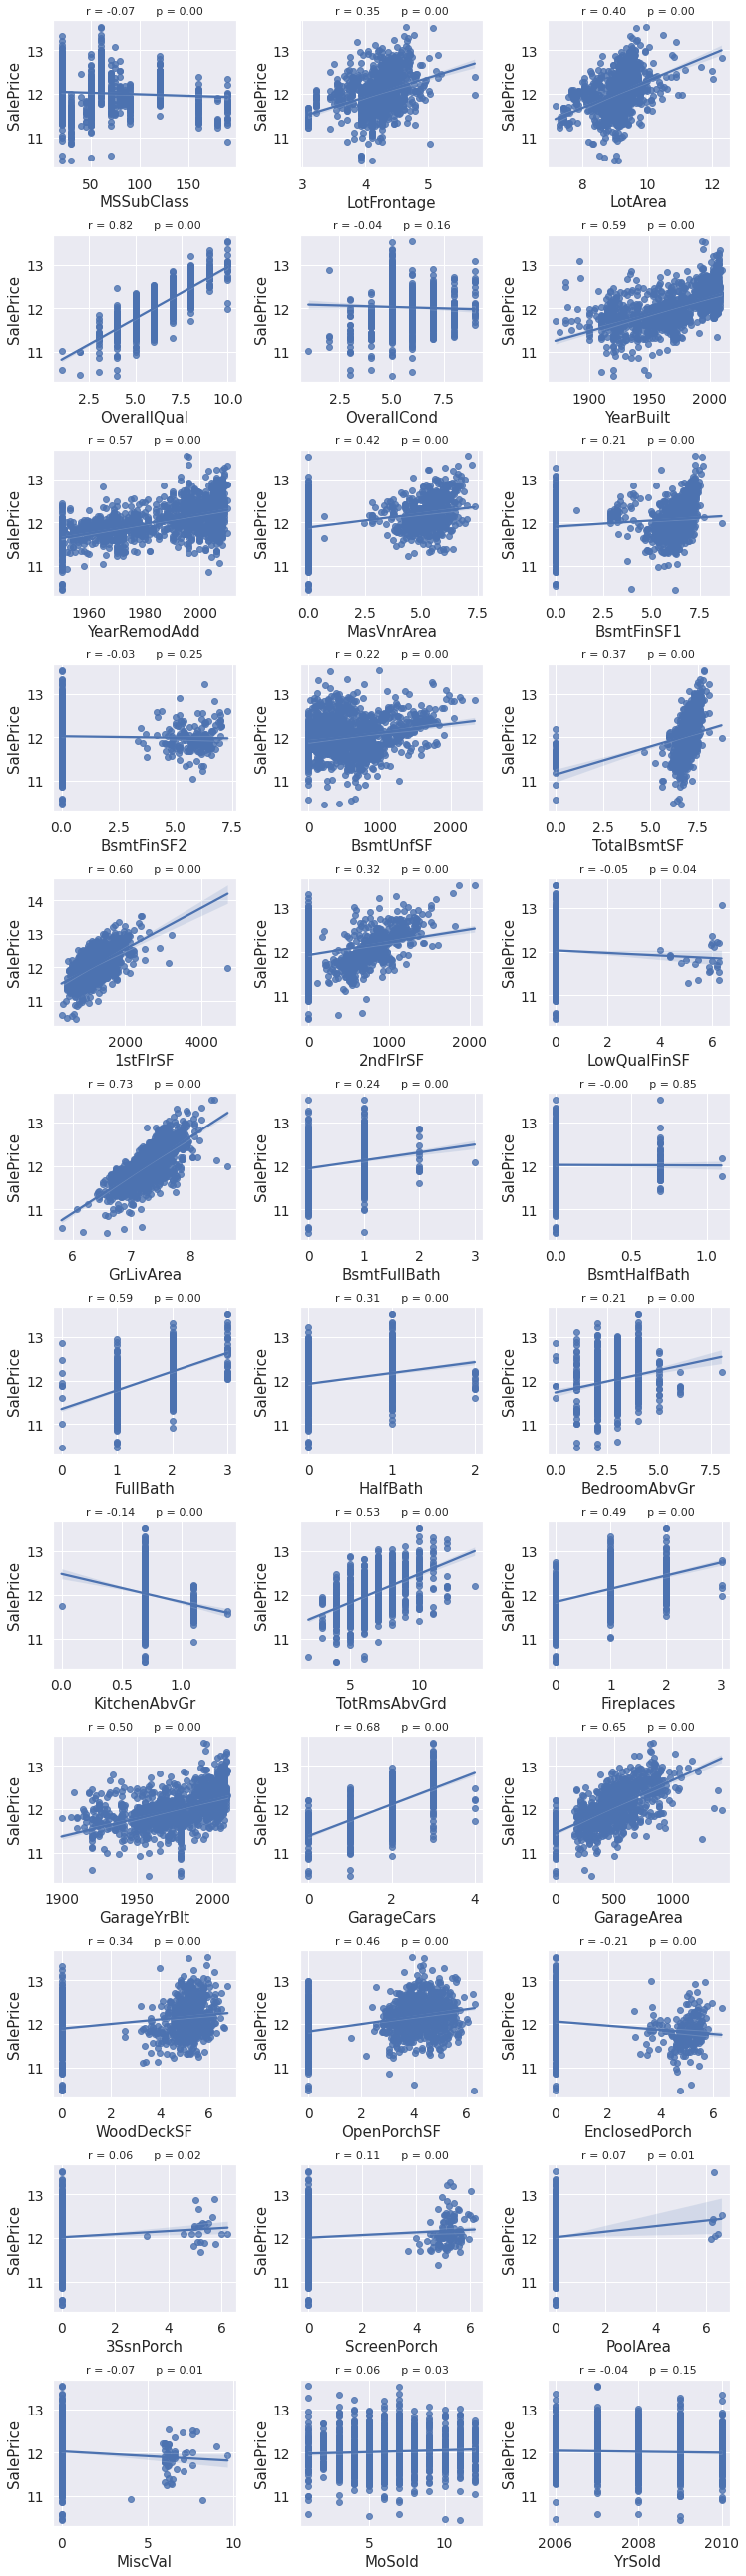

In [129]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[i]], df['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[i]], df['SalePrice'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [130]:
df = df.drop(
    df[(df['OverallQual']==10) & (df['SalePrice']<12.3)].index)
df = df.drop(
    df[(df['GrLivArea']>8.3) & (df['SalePrice']<12.5)].index)

In [131]:
corr = df.corr()
corr_abs = corr.abs()
min_val_corr = 0.4    


nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [132]:
print(ser_corr)

SalePrice        1.000000
OverallQual      0.821405
GrLivArea        0.737431
GarageCars       0.681033
GarageArea       0.656129
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
OpenPorchSF      0.460623
MasVnrArea       0.421013
LotArea          0.402820
TotalBsmtSF      0.373312
LotFrontage      0.350040
WoodDeckSF       0.343225
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209035
BsmtFinSF1       0.208255
EnclosedPorch    0.207249
KitchenAbvGr     0.144264
ScreenPorch      0.105897
PoolArea         0.076269
MSSubClass       0.073969
MiscVal          0.067037
3SsnPorch        0.058843
MoSold           0.057064
LowQualFinSF     0.054501
YrSold           0.037151
OverallCond      0.036821
BsmtFinSF2       0.030327
Id               0.017774
BsmtHalfBath     0.004865
Name: SalePr

In [133]:
print("List of numerical features with r above min_val_corr :", cols_abv_corr_limit)

List of numerical features with r above min_val_corr : ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'OpenPorchSF', 'MasVnrArea', 'LotArea']


In [134]:
print("List of numerical features with r below min_val_corr :", cols_bel_corr_limit)

List of numerical features with r below min_val_corr : ['TotalBsmtSF', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'BsmtFinSF1', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MiscVal', '3SsnPorch', 'MoSold', 'LowQualFinSF', 'YrSold', 'OverallCond', 'BsmtFinSF2', 'Id', 'BsmtHalfBath']


In [135]:
for catg in list(categorical_feats) :
    print(df[catg].value_counts())
    print('*'*50)

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**************************************************
Pave    1452
Grvl       6
Name: Street, dtype: int64
**************************************************
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64
**************************************************
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64
**************************************************
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64
**************************************************
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64
**************************************************
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**************************************************
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64
***************************

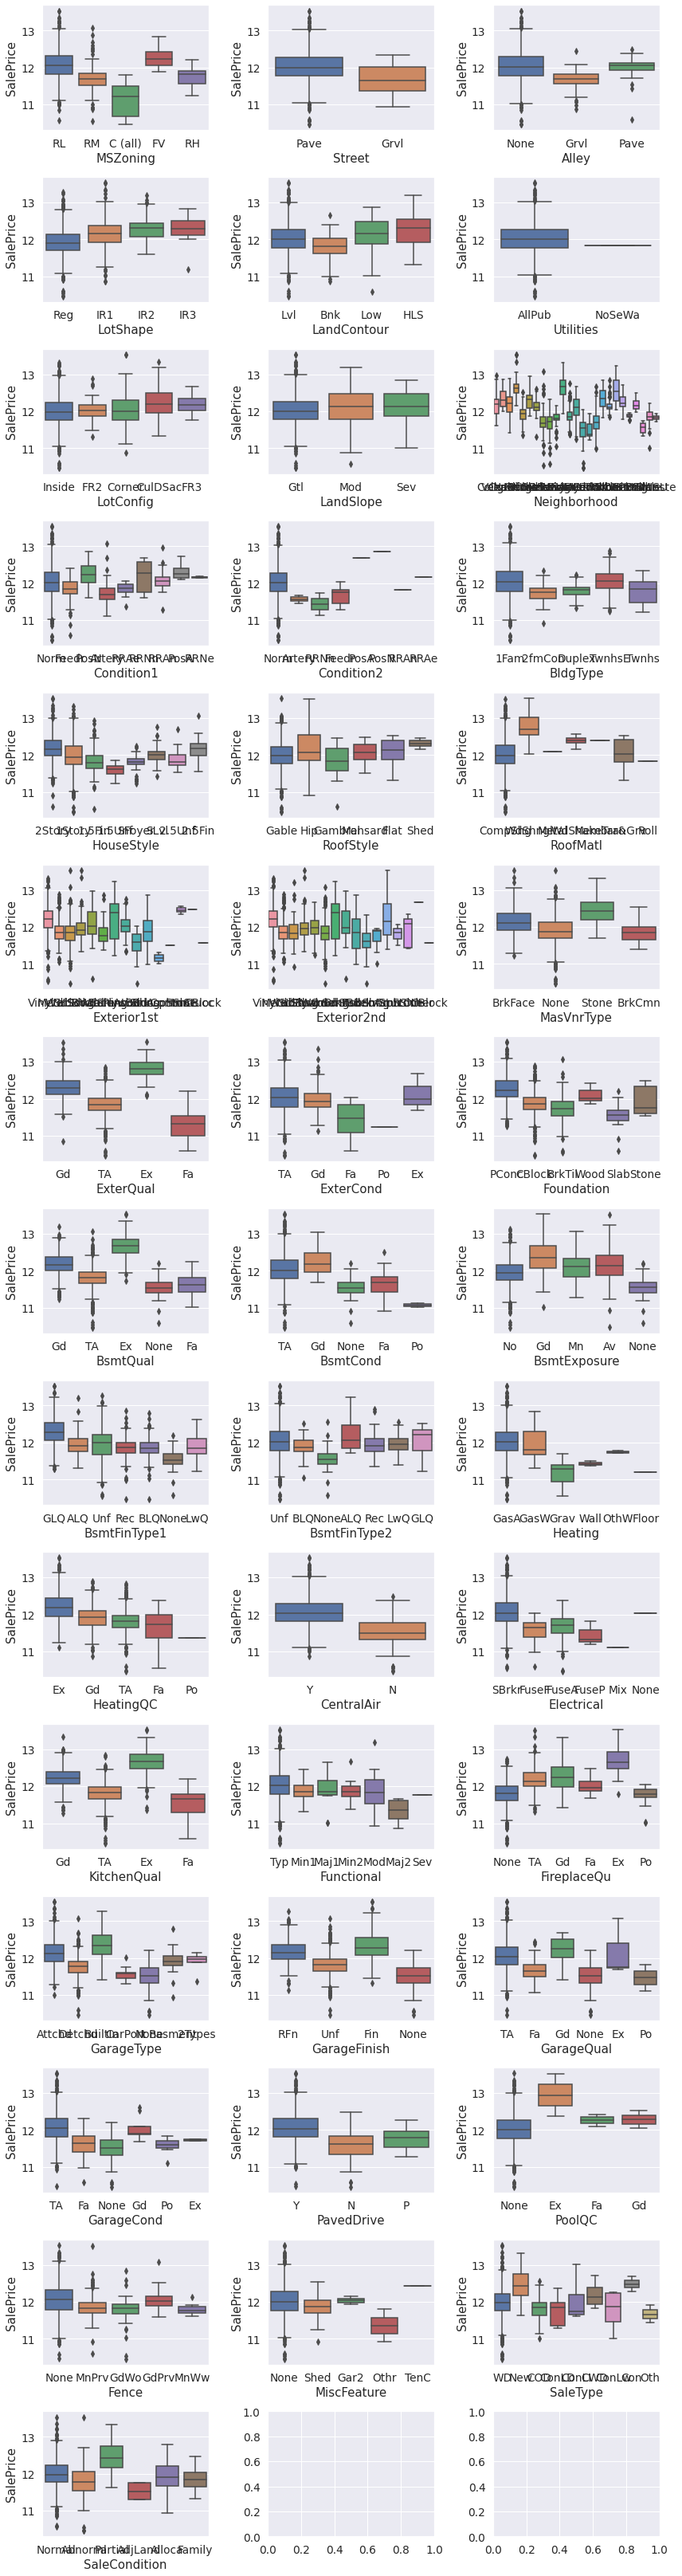

In [136]:
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(list(categorical_feats)):
            sns.boxplot(x=list(categorical_feats)[i], y='SalePrice', data=df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

In [137]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition']

In [138]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()


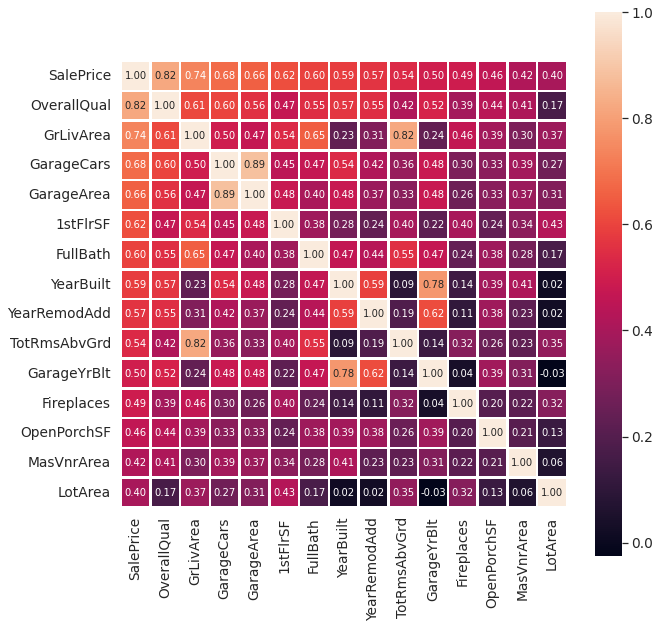

In [139]:
nr_feats = len(cols_abv_corr_limit)
plot_corr_matrix(df, nr_feats, 'SalePrice')

In [1]:
df.drop("Id", axis = 1, inplace = True)
y = df["SalePrice"]
df.drop("SalePrice", axis = 1, inplace = True)
df


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0)
print(f"X_train : {str(X_train.shape)}")
print(f"X_test : {str(X_test.shape)}")
print(f"y_train : {str(y_train.shape)}")
print(f"y_test : {str(y_test.shape)}")

In [ ]:
def get_predictions(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return preds

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = get_predictions(lr)
rmse(y_test, y_pred)